In [2]:
%cd ..
#%load_ext autoreload
#%autoreload 2

c:\Users\justi\coding\Uni\MA


In [3]:
import librosa
from glob import glob

from evoaudio.base_algorithms import approximate_piece
from evoaudio.sample_library import SampleLibrary
from evoaudio.population_logging import PopulationLogger
from parsing.arff_parsing import parse_arff

c:\Users\justi\miniconda3\envs\ma\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sample_lib = SampleLibrary()

Loading samples: 100%|██████████| 6826/6826 [00:11<00:00, 613.10it/s] 


In [5]:
# File IO
mixes = {file.split('_mix.mp3')[0][-4:]: librosa.load(file) for file in glob("./audio/tiny_aam/audio-mixes-mp3/*.mp3")}
annotations = {file.split('_onsets.arff')[0][-4:]: parse_arff(file) for file in glob("./audio/tiny_aam/annotations/*onsets.arff")}
len(annotations)

20

In [6]:
MAX_STEPS = 1000
ONSET_FRAC = 0.05
POPSIZE = 300
N_OFFSPRING = 1

### Multi Onset Experiments (Full piece approximation)

In [7]:
# Run experiment for each mix
name = list(mixes.keys())[0]
mix = mixes[name][0]
annotation = annotations[name]
onsets = [int(round(float(onset_time) * 22050)) for onset_time in annotation.keys()]
logger = PopulationLogger()
result = approximate_piece(target_y=mix, max_steps=MAX_STEPS, sample_lib=sample_lib, popsize=POPSIZE, n_offspring=N_OFFSPRING, onset_frac=ONSET_FRAC, logger=logger, onsets=onsets)

100%|██████████| 1000/1000 [00:45<00:00, 22.15it/s, Best individual: Fitness: 3.0031779775754175 | (Flute, tr332FLVIM, c4), (Piano, The_Gentleman, a1), (Drums, ARVintage_IvoryKit, FXCymbal1)]                                            


In [6]:
import os
def run_all_onset_experiment(mp3_file:str, annotation_file:str, max_steps:int, onset_frac:float, popsize:int, n_offspring:int, sample_lib:SampleLibrary, run_name:str=None):
    target_y, sr = librosa.load(mp3_file)
    annotations = parse_arff(annotation_file)
    onsets = [int(round(float(onset_time) * sr)) for onset_time in annotations.keys()]
    population = approximate_piece(target_y=target_y, max_steps=max_steps, sample_lib=sample_lib, popsize=popsize, n_offspring=n_offspring, onset_frac=onset_frac, onsets=onsets)
    if run_name is None:
        run_name = os.path.basename(mp3_file).replace(".mp3", "")
    population.save_as_file(run_name + ".pkl")

In [7]:
annotations = glob("./audio/tiny_aam/annotations/*onsets.arff")
for i, file in enumerate(glob("./audio/tiny_aam/audio-mixes-mp3/*.mp3")):
    run_all_onset_experiment(mp3_file=file, annotation_file=annotations[i], max_steps=MAX_STEPS, onset_frac=ONSET_FRAC, popsize=POPSIZE, n_offspring=N_OFFSPRING, sample_lib=sample_lib)

100%|██████████| 5000/5000 [05:00<00:00, 16.66it/s, Best individual: Fitness: 1.5822926133032367 | (ElectricBass, Scarbee_PreBass, cis1), (Flute, tr332FLNOM, b5), (Drums, AR70s_TightKit, Snare_Roll), (Trombone, Trombone_Essential, dis1)]                                       
c:\Users\justi\miniconda3\envs\ma\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1901
  warnings.warn(
c:\Users\justi\miniconda3\envs\ma\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1900
  warnings.warn(
100%|██████████| 5000/5000 [06:07<00:00, 13.62it/s, Best individual: Fitness: 1.0216420595291713 | (Trombone, Trombones_Essential, a0), (Drums, ARVintage_IvoryKit, Hihat_Closed_Pedal), (Organ, C3_Jazz, e3), (Drums, AR50s_AutumnKit, Hihat_Open)]                       
c:\Users\justi\miniconda3\envs\ma\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large 

In [7]:
from mutations import Mutator
mutator = Mutator(sample_library=sample_lib, l_bound=1, u_bound=1)

name = list(mixes.keys())[0]
mix = mixes[name][0]
annotation = annotations[name]
onsets = [int(round(float(onset_time) * 22050)) for onset_time in annotation.keys()]
logger = PopulationLogger()
result_2 = approximate_piece(target_y=mix, max_steps=MAX_STEPS, sample_lib=sample_lib, popsize=POPSIZE, n_offspring=N_OFFSPRING, onset_frac=ONSET_FRAC, logger=logger, onsets=onsets)

KeyboardInterrupt: 

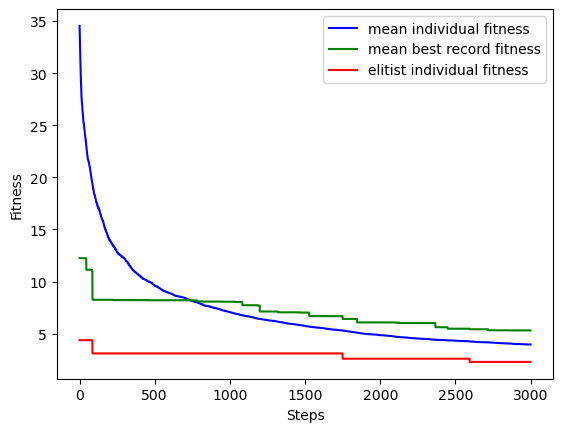

In [70]:
import matplotlib.pyplot as plt
plt.plot(logger.logged_steps, logger.mean_fitness, "b", label="mean individual fitness")
plt.plot(logger.logged_steps, logger.mean_fitness_best_records, "g", label="mean best record fitness")
plt.plot(logger.logged_steps, logger.elitist_fitness, "r", label="elitist individual fitness")
plt.xlabel("Steps")
plt.ylabel("Fitness")
#plt.ylim((4, 10))
plt.legend()


### Experiment analysis

In [8]:
from evoaudio.population import Population
for pop_file in glob("*mix.pkl"):
    pop = Population.from_file(pop_file)


### Single Onset Experiments

In [23]:
from evoaudio.base_algorithms import approximate_single_onset
from evoaudio.mutations import Mutator

# Run experiment for each onsetfrom mutations import Mutator
mutator = Mutator(sample_library=sample_lib, l_bound=1, u_bound=1)

name = list(mixes.keys())[0]
mix = mixes[name][0]
annotation = annotations[name]
onsets = [int(round(float(onset_time) * 22050)) for onset_time in annotation.keys()]
logger = PopulationLogger()
result = approximate_single_onset(target_y=mix, max_steps=10000, sample_lib=sample_lib, popsize=10, n_offspring=1, onset_start=onsets[0], onset_end=onsets[1], logger=logger)

100%|██████████| 10000/10000 [01:51<00:00, 89.67it/s, Best individual: Fitness: 0.9135556997903963 | (Tanbur, tanbur, fis1), (Flute, tr332FLVIM, c4), (Fujara, fujara, f3), (AcousticGuitar, tr113AGRFM, fis2), (Tanbur, tanbur, gis1)]                                 


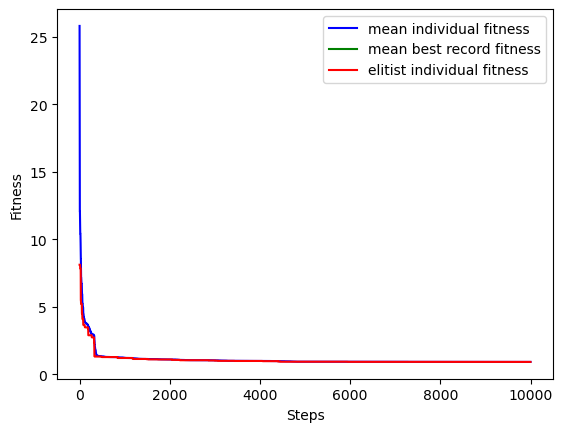

In [25]:
import matplotlib.pyplot as plt
plt.plot(logger.logged_steps, logger.mean_fitness, "b", label="mean individual fitness")
plt.plot(logger.logged_steps, logger.mean_fitness_best_records, "g", label="mean best record fitness")
plt.plot(logger.logged_steps, logger.elitist_fitness, "r", label="elitist individual fitness")
plt.xlabel("Steps")
plt.ylabel("Fitness")
#plt.ylim((4, 10))
plt.legend()


In [4]:
from multiprocessing import Process
from multiprocessing.managers import BaseManager

# File IO
mixes = {file.split('_mix.mp3')[0][-4:]: librosa.load(file) for file in glob("./audio/tiny_aam/audio-mixes-mp3/*.mp3")}
annotations = {file.split('_onsets.arff')[0][-4:]: parse_arff(file) for file in glob("./audio/tiny_aam/annotations/*onsets.arff")}
onsets = list(annotations.keys())

class LibraryManager(BaseManager):
    pass

LibraryManager.register('SampleLibrary', SampleLibrary)
with LibraryManager() as manager:
    shared_lib = manager.SampleLibrary()
    processes = [Process(target=approximate_piece, args=(y[0], MAX_STEPS, shared_lib, POPSIZE, N_OFFSPRING, ONSET_FRAC, None, None, onsets[i])) for i, y in enumerate(mixes[:2])]
    for process in processes:
        process.start()
    for process in processes:
        process.join()
    print("Done")

Experiment Analysis

In [6]:
from evoaudio.individual import BaseIndividual
from evoaudio.population import Population
from enum import Enum
import numpy as np
import os
import pandas as pd
from glob import glob

class class_mode(Enum):
    INSTRUMENTS = 0
    PITCHES = 1
    COMBINED = 2

def extract_instruments(individual:BaseIndividual):
    seen_instruments = []
    for sample in individual.samples:
        if sample.instrument not in seen_instruments:
            seen_instruments.append(sample.instrument)
    return seen_instruments

def extract_pitches(individual:BaseIndividual):
    seen_pitches = []
    for sample in individual.samples:
        if sample.pitch not in seen_pitches:
            seen_pitches.append(sample.pitch)
    return seen_pitches

def extract_samples(individual:BaseIndividual):
    seen_samples = []
    for sample in individual.samples:
        if (sample.instrument, sample.pitch) not in seen_samples:
            seen_samples.append((sample.instrument, sample.pitch))
    return seen_samples

def jaccard_error(population:Population, annotations:dict, mode:class_mode):
    """Iteratively calculates the jaccard error for each onset, then returns the mean.

    Parameters
    ----------
    population : Population
        candidate population.
    annotations : dict
        extracted annotations in style {onset: [(instrument1, pitch1), (instrument2, pitch2), ...]}
    mode : class_mode
        whether to calculate the error for instrument, pitch or combined approximation

    Returns
    -------
    float
        mean jaccard error across all onsets.
    """
    time_onsets = list(annotations.keys())
    jaccard_errors_per_onset = []
    for i, onset in enumerate(population.archive):
        individual = population.archive[onset].individual
        time_onset = time_onsets[i]
        match mode:
            case class_mode.INSTRUMENTS:
                extracted_features = extract_instruments(individual)
                annotated_features = [annotation[0] for annotation in annotations[time_onset]]
            case class_mode.PITCHES:
                extracted_features = extract_pitches(individual)
                annotated_features = [int(annotation[1].replace("+", "")) for annotation in annotations[time_onset]]
            case class_mode.COMBINED:
                extracted_features = extract_samples(individual)
                annotated_features = annotations[time_onset]
        intersection = [instrument for instrument in extracted_features if instrument in annotated_features]
        union = list(set(extracted_features) | set(annotated_features))
        false_positives = set(extracted_features).symmetric_difference(intersection)
        false_negatives = set(annotated_features).symmetric_difference(intersection)
        jaccard_errors_per_onset.append((len(false_positives) + len(false_negatives)) / len(union))

    return np.mean(jaccard_errors_per_onset)
j_i = []
j_p = []
j_ip = []
experiment_name = 'tiny_aam/300_1_10000_0.05_5_10_1_20_0.9954_15_10_1sec_repeat'
popfiles = glob(f'./experiments/{experiment_name}/**/*.pkl', recursive=True)
run_names = []
for popfile in popfiles:
    run_name = os.path.basename(popfile).split("_")[0].replace(".pkl", "")
    run_names.append(run_name)
    pop = Population.from_file(popfile)
    annotations = parse_arff(f'./audio/tiny_aam/annotations/{run_name}_onsets.arff')
    j_i.append(jaccard_error(pop, annotations, class_mode.INSTRUMENTS))
    j_p.append(jaccard_error(pop, annotations, class_mode.PITCHES))
    j_ip.append(jaccard_error(pop, annotations, class_mode.COMBINED))
df = pd.DataFrame({'j_i': j_i, 'j_p': j_p, 'j_ip': j_ip}, index=run_names)
df.to_csv(f'./experiments/{experiment_name}_results.csv')
df.mean()
# np.mean(j_i), np.mean(j_p), np.mean(j_ip)

j_i     0.804837
j_p     0.844846
j_ip    1.000000
dtype: float64

In [36]:
lengths = [len(record.individual.samples) for record in pop.archive.values()]
np.mean(lengths)

3.462162162162162